# **이변량분석 : 숫자 vs 숫자**

* 우리가 사용하는 도구는...
    * 두 변수와의 관계를 살펴보기 위해, 두가지 도구(시각화, 수치화)를 이용합니다.
    * 이 도구들도 각각 한계가 있습니다. 보이는게 전부가 아님을 꼭 명심하세요! 
    * 특히 수치화 도구(가설검정 도구)는 많은 가정들이 전제 됩니다. 
    * 그래서 이번 과정에서는 그 도구를 사용하는 데에 집중합니다. 


## **1.환경준비**

* 라이브러리 불러오기

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> ① 타이타닉 생존자  
② 뉴욕 공기 오염도


In [8]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')
air['Date'] = pd.to_datetime(air['Date'])
air.head()

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


----

## **2.시각화 : 산점도**

* 상관 분석에 대해서 이야기 해봅시다.
    * 상관 분석은 연속형 변수 X에 대한 연속형 변수 Y의 관계를 분석할 때 사용됩니다.
    * Scatter를 통해 시각화 합니다.
* 가설 : 온도(x)가 상승하면 아이스크림 판매량(y)을 증가할까?
    * 어떤 관계가 보이나요?
    * 얼마나 강한 관계인가요?
* 숫자 vs 숫자를 비교할 때 중요한 관점이 **'직선'(Linearity)** 입니다.



<img src='https://github.com/DA4BAM/image/blob/main/%EC%82%B0%EC%A0%90%EB%8F%84_ex.png?raw=true' width=500/>

### **(1) 산점도**

* 문법
    * plt.scatter( x축 값, y축 값 )
    * plt.scatter( ‘x변수’, ‘y변수’, data = dataframe이름) 

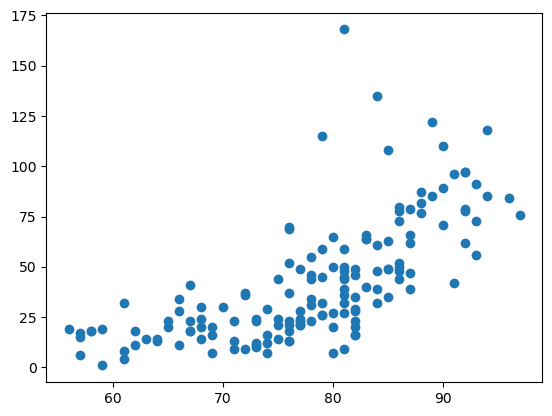

In [16]:
plt.scatter(air['Temp'], air['Ozone'])
plt.show()

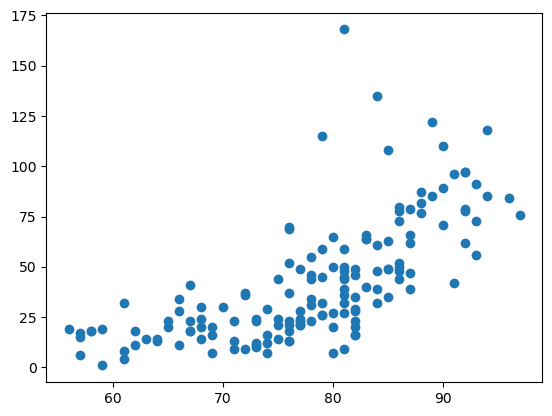

In [17]:
plt.scatter('Temp', 'Ozone', data = air)
plt.show()

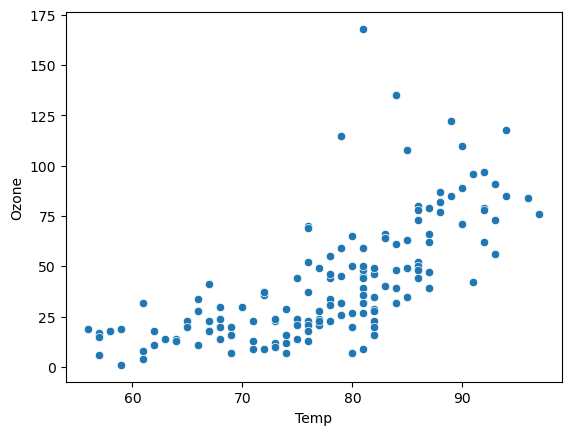

In [18]:
sns.scatterplot(x='Temp', y='Ozone', data = air)
plt.show()

그래프를 그렸으면, 그래프로부터 정보를 파악해야 합니다.  

무엇이 보이나요?

In [ ]:
temp가 오를 수록  오존 수치가 오른다

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

* [문1] Temp, Wind, Solar.R 과 Ozone 과의 관계를 시각화 해 봅시다.

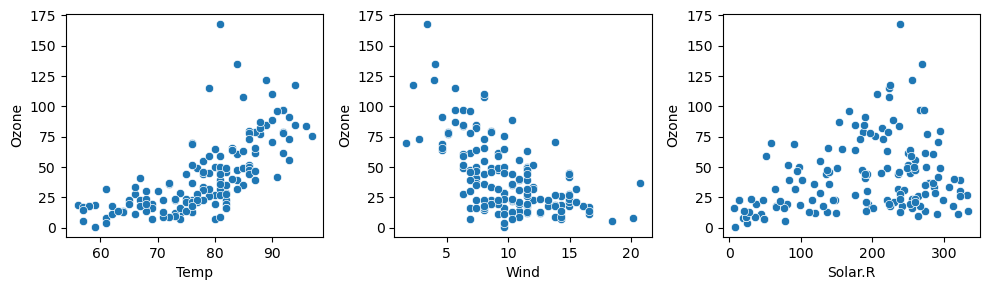

In [22]:
plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
sns.scatterplot(x = 'Temp', y = 'Ozone' ,data= air)


plt.subplot(1,3,2)
sns.scatterplot(x = 'Wind', y = 'Ozone' ,data= air)


plt.subplot(1,3,3)
sns.scatterplot(x = 'Solar.R', y = 'Ozone' ,data= air)


plt.tight_layout()

plt.show()

* [문2] Ozone과 가장 강한 관계의 x변수는?

In [ ]:
 temp

* 두 변수의 관계
    * 산점도에서 또렷한 패턴이 보인다면, 강한 관계로 볼 수 있습니다.
    * 특히, 직선의 패턴이 보인다면

<img src='https://cqeacademy.com/wp-content/uploads/2018/06/Scatter-Plots-and-Correlation-Examples.png' width=800/>

### **(2) pairplot 한꺼번에 시각화**

* 숫자형 변수들에 대한 산점도를 한꺼번에 그려줍니다.
* 그러나 **시간이 많이**걸립니다.

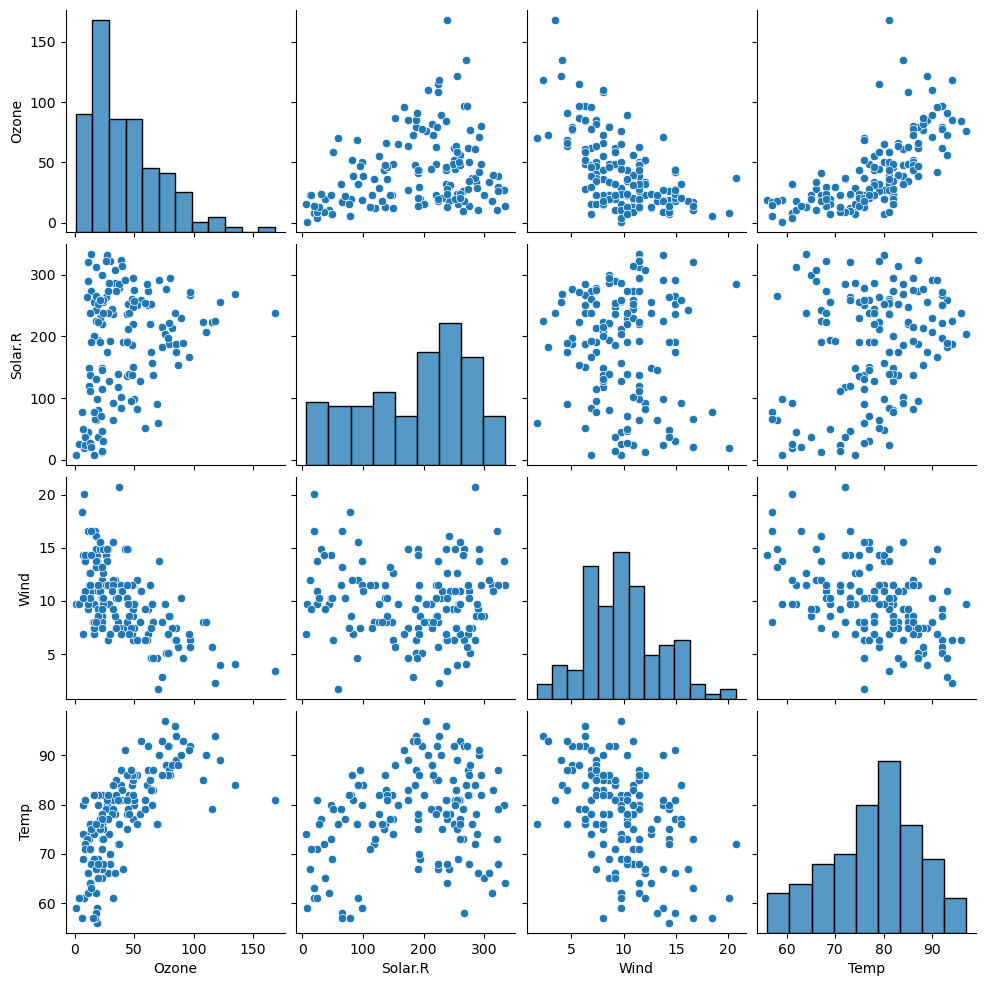

In [27]:
sns.pairplot(air)
plt.show()

###  **(3) (추가) jointplot, regplot**

* jointplot은 산점도와 각각의 히스토그램을 함께 보여줍니다.

* Temp --> Ozone

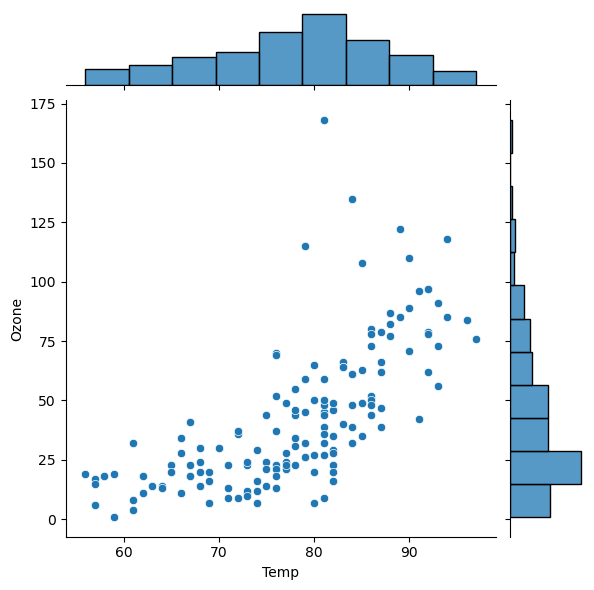

In [30]:
sns.jointplot(x='Temp', y='Ozone', data = air)
plt.show()

* Wind --> Ozone

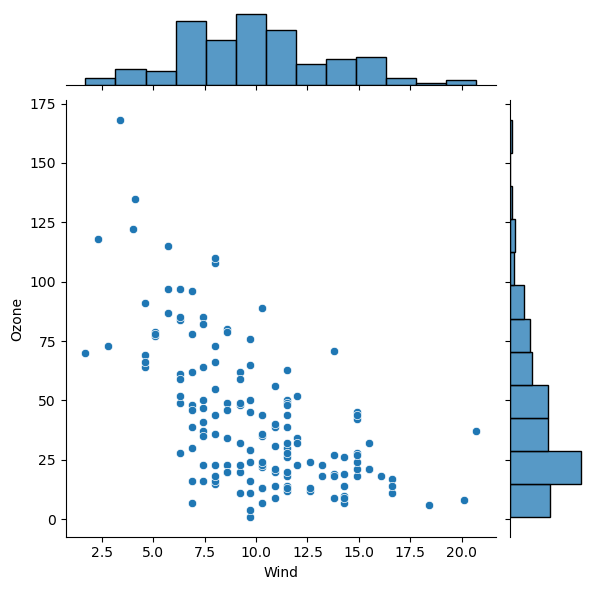

In [32]:
sns.jointplot(x='Wind', y='Ozone', data = air)
plt.show()

* Solar.R --> Ozone

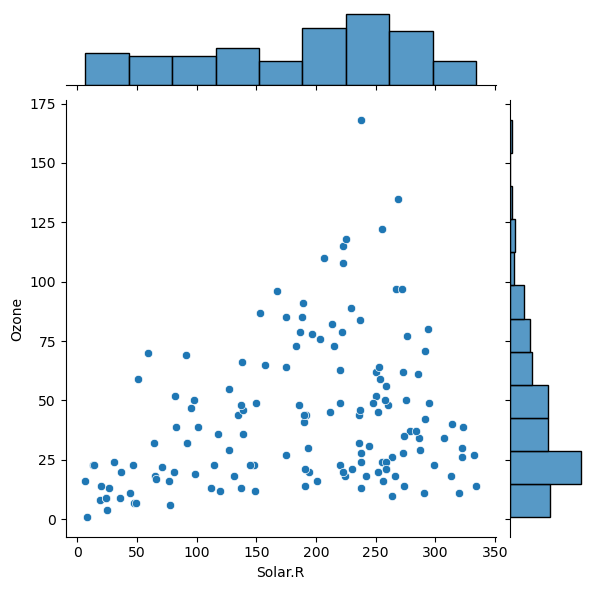

In [34]:
sns.jointplot(x='Solar.R', y='Ozone', data = air)
plt.show()

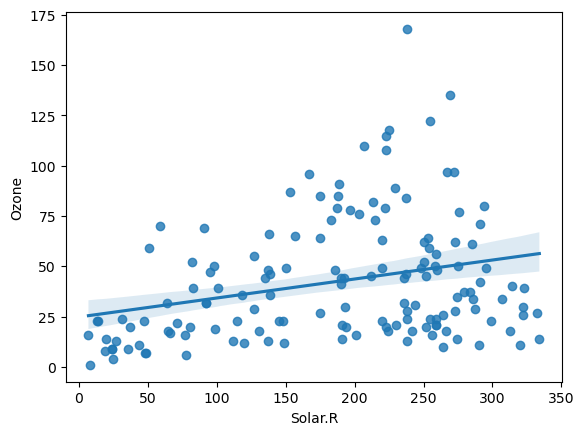

In [35]:
sns.regplot(x='Solar.R', y='Ozone', data = air)
plt.show()

## **3.수치화 : 상관분석**

### (1) 상관계수, p-value

* 상관계수 𝑟
    * 공분산을 표준화 한 값
    * -1 ~ 1 사이의 값
    * -1, 1에 가까울 수록 강한 상관관계를 나타냄.

* 경험에 의한 대략의 기준(절대적인 기준이 절대 아닙니다.)
    * 강한 : 0.5 < |𝑟| ≤ 1
    * 중간 : 0.2 < |𝑟| ≤ 0.5
    * 약한 : 0.1 < |𝑟| ≤ 0.2
    * (거의)없음 : |𝑟| ≤ 0.1
    

In [39]:
import scipy.stats as spst

In [40]:
# 상관계수와 p-value 
spst.pearsonr(air['Temp'], air['Ozone'])

PearsonRResult(statistic=0.6833717861490114, pvalue=2.197769800200284e-22)

결과는 튜플로 나오는데

1. 튜플의 첫 번째 값 : 상관계수를 뜻합니다.
2. 두번째 값 : p-value
    * 귀무가설 : 상관 관계가 없다.(상관계수가 0이다.)
    * 대립가설 : 상관 관계가 있다.(상관계수가 0이 아니다.)
3. 주의 사항 : 값에 NaN이 있으면 계산되지 않습니다. 반드시 .notnull()로 제외하고 수행해야 합니다.

### **(2) 데이터프레임 한꺼번에 상관계수 구하기**

In [43]:
# 데이터프레임으로 부터 수치형 데이터에 대한 상관계수 구하기
air.corr()

,Ozone,Solar.R,Wind,Temp,Date
Ozone,1.000000,0.280068,-0.605478,0.683372,0.170271
Solar.R,0.280068,1.000000,-0.056792,0.275840,-0.104682
Wind,-0.605478,-0.056792,1.000000,-0.457988,-0.168683
Temp,0.683372,0.275840,-0.457988,1.000000,0.385605
Date,0.170271,-0.104682,-0.168683,0.385605,1.000000


위 결과로 부터,
1. 같은 변수끼리 구한 값 1은 의미 없다.
2. 상관계수의 절대값이 
    * 1에 가까울 수록 강한 상관관계
    * 0에 가까울 수록 약한 상관관계
3. +는 양의 상관관계, -는 음의 상관관계 

### **(3) (추가) 상관계수를 heatmap으로 시각화**

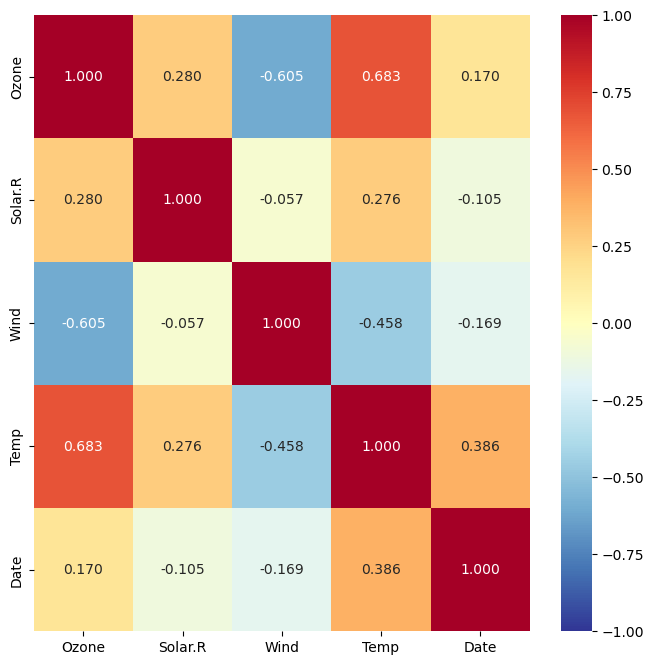

In [46]:
plt.figure(figsize = (8, 8))
sns.heatmap(air.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
plt.show()

칼라를 변경하려면 아래 링크로 가서 color map 을 확인하고 조정하세요.  
cmap(color map) : https://matplotlib.org/stable/tutorials/colors/colormaps.html

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

* 다음의 변수에 대해서 상관분석을 수행하시오.

* [문1] Temp --> Ozone 

In [51]:
air.corr()


result = spst.pearsonr(air['Temp'], air['Ozone'])

print(f' r: {result[0]}')

print(f' pv: {result[1]}')

 r: 0.6833717861490114
 pv: 2.197769800200284e-22


* [문2] Wind --> Ozone 

In [53]:

result = spst.pearsonr(air['Wind'], air['Ozone'])



print(f' r: {result[0]}')

print(f' pv: {result[1]}')

 r: -0.6054782354684075
 pv: 1.1255146087637916e-16


* [문3] Solar.R --> Ozone 
    * 단, Solar.R 에는 NaN이 있습니다. NaN을 제외(.notnull())하고, 상관분석을 수행하시오.

In [55]:
temp = air.loc[air['Solar.R'].notna()]
result = spst.pearsonr(temp['Wind'], temp['Ozone'])



print(f' r: {result[0]}')

print(f' pv: {result[1]}')

 r: -0.618370757007766
 pv: 9.075942464053992e-17


## **4.복습문제**

* 보스톤 집값 데이터를 이용하여 다음의 복습문제를 풀어 봅시다.

* **변수설명**
> * **medv**  : 1978 보스턴 주택 가격, 506개 타운의 주택 가격 중앙값 (단위 1,000 달러) <== **Target**
> * **crim** :	범죄율
> * **zn** :	25,000 평방피트를 초과 거주지역 비율
> * **indus** :	비소매상업지역 면적 비율
> * **chas** :	찰스강변 위치(범주 : 강변1, 아니면 0)
> * **nox** :	일산화질소 농도
> * **rm** :	주택당 방 수
> * **age** :	1940년 이전에 건축된 주택의 비율
> * **dis** :	직업센터의 거리
> * **rad** :	방사형 고속도로까지의 거리
> * **tax** :	재산세율
> * **ptratio** :	학생/교사 비율
> * **lstat** :	인구 중 하위 계층 비율


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

In [60]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


* 1) crim(범죄율) --> medv(집값) 에 대해 시각화와 수치화(상관분석)을 수행후 관계를 평가하시오.

-0.3883046085868116
1.1739870821943826e-19


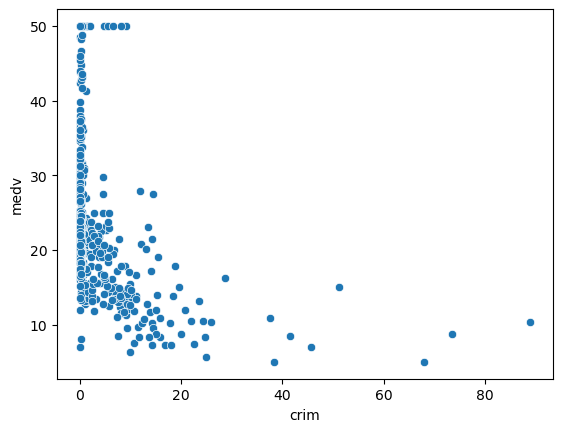

In [62]:
result = spst.pearsonr(boston['crim'], boston['medv'])

print(result[0])
print(result[1])


sns.scatterplot(x='crim', y='medv', data=boston)
plt.show()

In [63]:
def eda_2nn(data,x,y):
    result = spst.pearsonr(data[x], data[y])
    print(result[0])
    print(result[1])
    
    sns.scatterplot(x = x, y= y, data= data)


-0.3883046085868116
1.1739870821943826e-19


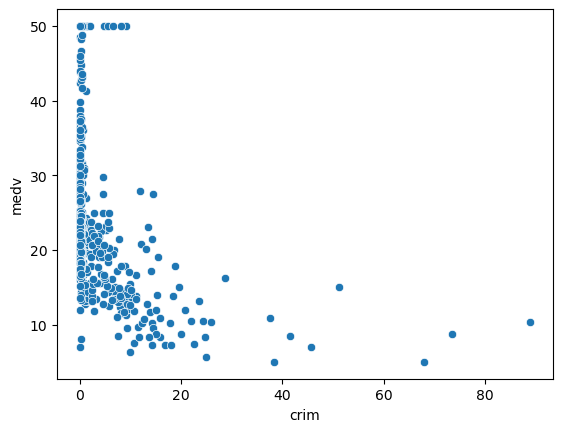

In [64]:
eda_2nn(boston,'crim','medv')

In [65]:
#음의 상관관계가 존재한다. (-0.38)
#


* 2) tax(제산세율) --> medv(집값) 에 대해 시각화와 수치화(상관분석)을 수행후 관계를 평가하시오.

-0.4685359335677671
5.637733627690444e-29


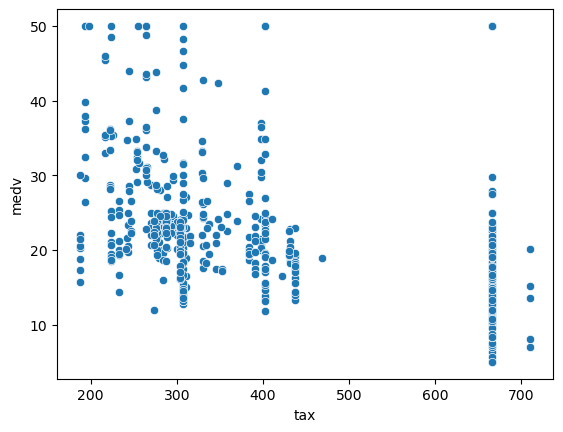

In [67]:
result = spst.pearsonr(boston['tax'], boston['medv'])

print(result[0])
print(result[1])

sns.scatterplot(x='tax', y= 'medv',data=boston)
plt.show()

-0.4685359335677671
5.637733627690444e-29


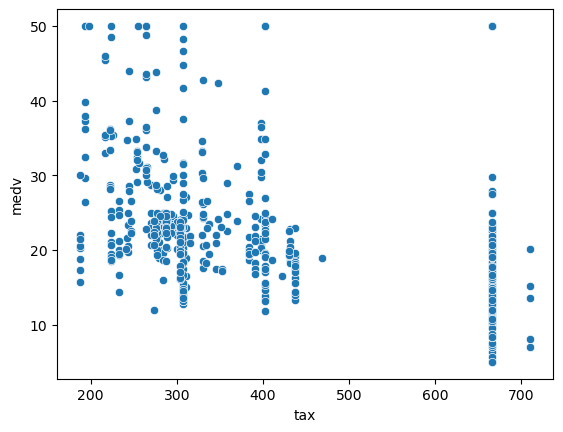

In [68]:
eda_2nn(boston,'tax','medv')

In [69]:
#큰 상관광계까 없다

* 3) lstat(하위계층비율) --> medv(집값) 에 대해 시각화와 수치화(상관분석)을 수행후 관계를 평가하시오.

In [71]:
result = spst.pearsonr(boston['lstat'], boston['medv'])

print(result[0])
print(result[1])


-0.7376627261740148
5.081103394387554e-88


-0.7376627261740148
5.081103394387554e-88


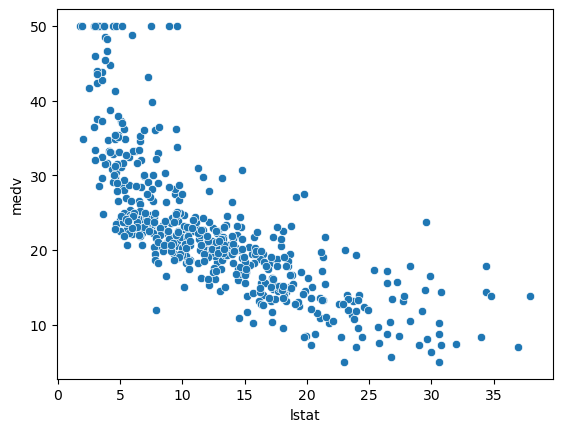

In [72]:
eda_2nn(boston,'lstat','medv')

# 음의 상관관계를 가진다. (0.7 강한 상관관계)
#p값이 0과 매우 가깝다

In [73]:
#하위계층의 비율이 높을 수록 집값이 선형적으로 감소하는구나!


In [74]:
#4. ptratio(교사 1인당 학생수) --> medv(집값) 에 대해 시각화와 수치화(상관분석)을 수행후 관계를 평가하시오.

In [75]:
result = spst.pearsonr(boston['ptratio'], boston['medv'])

print(result[0])
print(result[1])


-0.507786685537562
1.6095094784727943e-34


-0.507786685537562
1.6095094784727943e-34


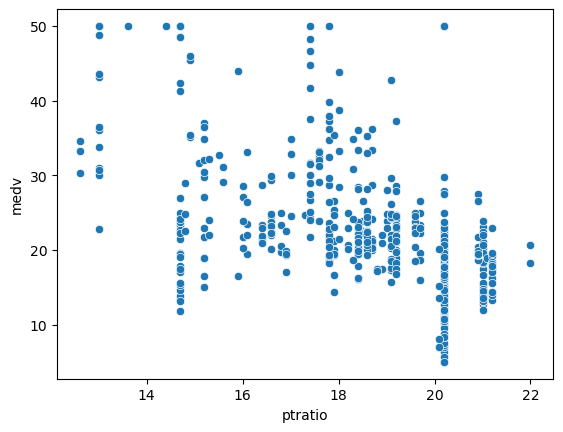

In [76]:
eda_2nn(boston,'ptratio','medv')

In [77]:
# 0.5보다 크면 강한 상관관계 작으면 약한 상관관계

* 4) 전체 변수들끼리의 상관계수를 구하고, 가장 강한 상관관계와 가장 약한 상관관계를 찾아 봅시다.

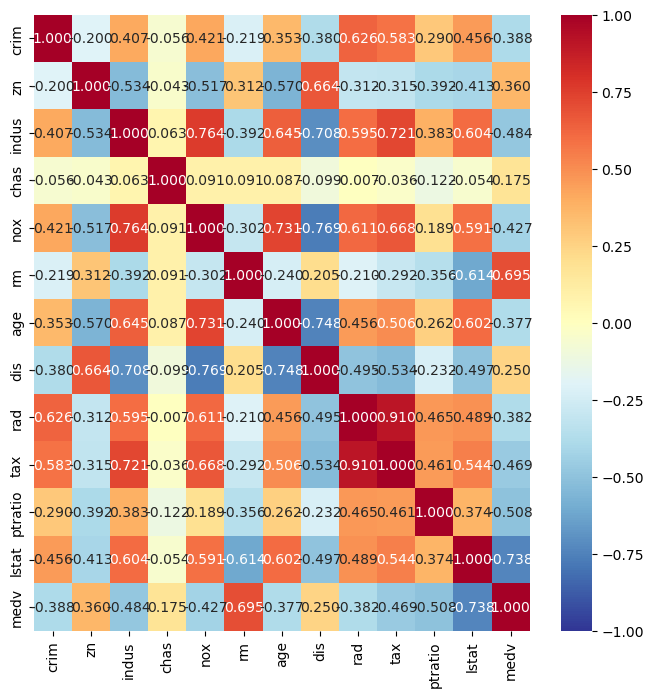

In [79]:
boston.corr()

plt.figure(figsize = (8, 8))
sns.heatmap(boston.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
plt.show()